In [1]:
import pandas as pd
import numpy as np

# Load data
calendar = pd.read_csv('m5-forecasting-accuracy/calendar.csv')
sales_vali = pd.read_csv('m5-forecasting-accuracy/sales_train_validation.csv')
prices = pd.read_csv('m5-forecasting-accuracy/sell_prices.csv')
sales_eval = pd.read_csv('m5-forecasting-accuracy/sales_train_evaluation.csv')

# 1. Data Analysis
# 1.1 Data Size

In [208]:
print(sales_vali.info())
print(sales_vali.head())
print(sales_vali.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: int64(1913), object(6)
memory usage: 446.4+ MB
None
                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1  d_2  d_3  d_4  ...  d_1904  d_1905  d_1906  d_1907  d_1908  \
0       CA    0    0    0    0  ...       1       3       0       1       1   
1       CA    0    0    0    0  ...       0       0       0       0       0   
2       CA    0    0    0    0  ...       2       1       2       1       1   
3       CA    0    0    0    0 

In [209]:
print(sales_eval.info())
print(sales_eval.head())
print(sales_eval.tail())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1947 entries, id to d_1941
dtypes: int64(1941), object(6)
memory usage: 452.9+ MB
None
                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1  d_2  d_3  d_4  ...  d_1932  d_1933  d_1934  d_1935  d_1936  \
0       CA    0    0    0    0  ...       2       4       0       0       0   
1       CA    0    0    0    0  ...       0       1       2       1       1   
2       CA    0    0    0    0  ...       1       0       2       0       0   
3       CA    0    0    0    0 

In [210]:
print(calendar.info())
print(calendar.head())
print(calendar.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB
None
         date  wm_yr_wk    weekday  wday  month  year    d event_name_1  \
0  2011-01-29     11101   Saturday     1      1  2011  d_1          NaN   
1  2011-01-30 

In [4]:
print(prices.info())
print(prices.head())
print(prices.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB
None
  store_id        item_id  wm_yr_wk  sell_price
0     CA_1  HOBBIES_1_001     11325        9.58
1     CA_1  HOBBIES_1_001     11326        9.58
2     CA_1  HOBBIES_1_001     11327        8.26
3     CA_1  HOBBIES_1_001     11328        8.26
4     CA_1  HOBBIES_1_001     11329        8.26
        store_id      item_id  wm_yr_wk  sell_price
6841116     WI_3  FOODS_3_827     11617         1.0
6841117     WI_3  FOODS_3_827     11618         1.0
6841118     WI_3  FOODS_3_827     11619         1.0
6841119     WI_3  FOODS_3_827     11620         1.0
6841120     WI_3  FOODS_3_827     11621         1.0


## 1.2 Data Preprocessing 

In [6]:
''' Preprocess data '''

# 1. Convert sales_df to long format
data = sales_vali.melt(
    id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], 
    var_name='d', 
    value_name='sales'
)

# 2. Merge sales_long with calendar_df on 'd'
data = data.merge(
    calendar,
    on='d',
    how='left'
)

data['d'] = data['d'].str.extract('(\d+)').astype(int)

# 3. Merge data with prices_df on 'item_id' and 'store_id'
data = data.merge(
    prices,
    on=['store_id', 'item_id', 'wm_yr_wk'],
    how='left'
)

# 4. Process date attributes
data['date'] = pd.to_datetime(data['date'])
data['is_weekend'] = (data['wday'] <= 2).astype(int)

print(data.info())
print(data.head())
print(data.tail())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 58327370 entries, 0 to 58327369
Data columns (total 23 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            object        
 1   item_id       object        
 2   dept_id       object        
 3   cat_id        object        
 4   store_id      object        
 5   state_id      object        
 6   d             int64         
 7   sales         int64         
 8   date          datetime64[ns]
 9   wm_yr_wk      int64         
 10  weekday       object        
 11  wday          int64         
 12  month         int64         
 13  year          int64         
 14  event_name_1  object        
 15  event_type_1  object        
 16  event_name_2  object        
 17  event_type_2  object        
 18  snap_CA       int64         
 19  snap_TX       int64         
 20  snap_WI       int64         
 21  sell_price    float64       
 22  is_weekend    int64         
dtypes: datetime64[ns](1), float64(

## 1.3 Feature Analysis

In [7]:
''' Feature Engineering '''

# 1. Create lagged features
def create_lag_features(df, lags=[1, 7, 28]):
    for lag in lags:
        df[f'lag_{lag}'] = df.groupby(['id'])['sales'].shift(lag)
    return df

data = data.sort_values(['id', 'date'])
data = create_lag_features(data)

# 2. Rolling window features
data['rolling_mean_7'] = data.groupby('id')['sales'].transform(
    lambda x: x.rolling(7, min_periods=1).mean()
)
data['rolling_std_7'] = data.groupby('id')['sales'].transform(
    lambda x: x.rolling(7, min_periods=1).std()
)

#  3. Price change features
data['price_ratio'] = data.groupby(['id'])['sell_price'].transform(
    lambda x: x / x.rolling(28, min_periods=1).mean()
)

columns = ['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2']
if data[columns].isna().any().any():
    print("Warning: missing features, fill with 0")
    data[columns] = data[columns].fillna(0)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58327370 entries, 1612 to 58325932
Data columns (total 29 columns):
 #   Column          Dtype         
---  ------          -----         
 0   id              object        
 1   item_id         object        
 2   dept_id         object        
 3   cat_id          object        
 4   store_id        object        
 5   state_id        object        
 6   d               int64         
 7   sales           int64         
 8   date            datetime64[ns]
 9   wm_yr_wk        int64         
 10  weekday         object        
 11  wday            int64         
 12  month           int64         
 13  year            int64         
 14  event_name_1    object        
 15  event_type_1    object        
 16  event_name_2    object        
 17  event_type_2    object        
 18  snap_CA         int64         
 19  snap_TX         int64         
 20  snap_WI         int64         
 21  sell_price      float64       
 22  is_weekend   

### 1.3.1 Visualization of time-series feature trends

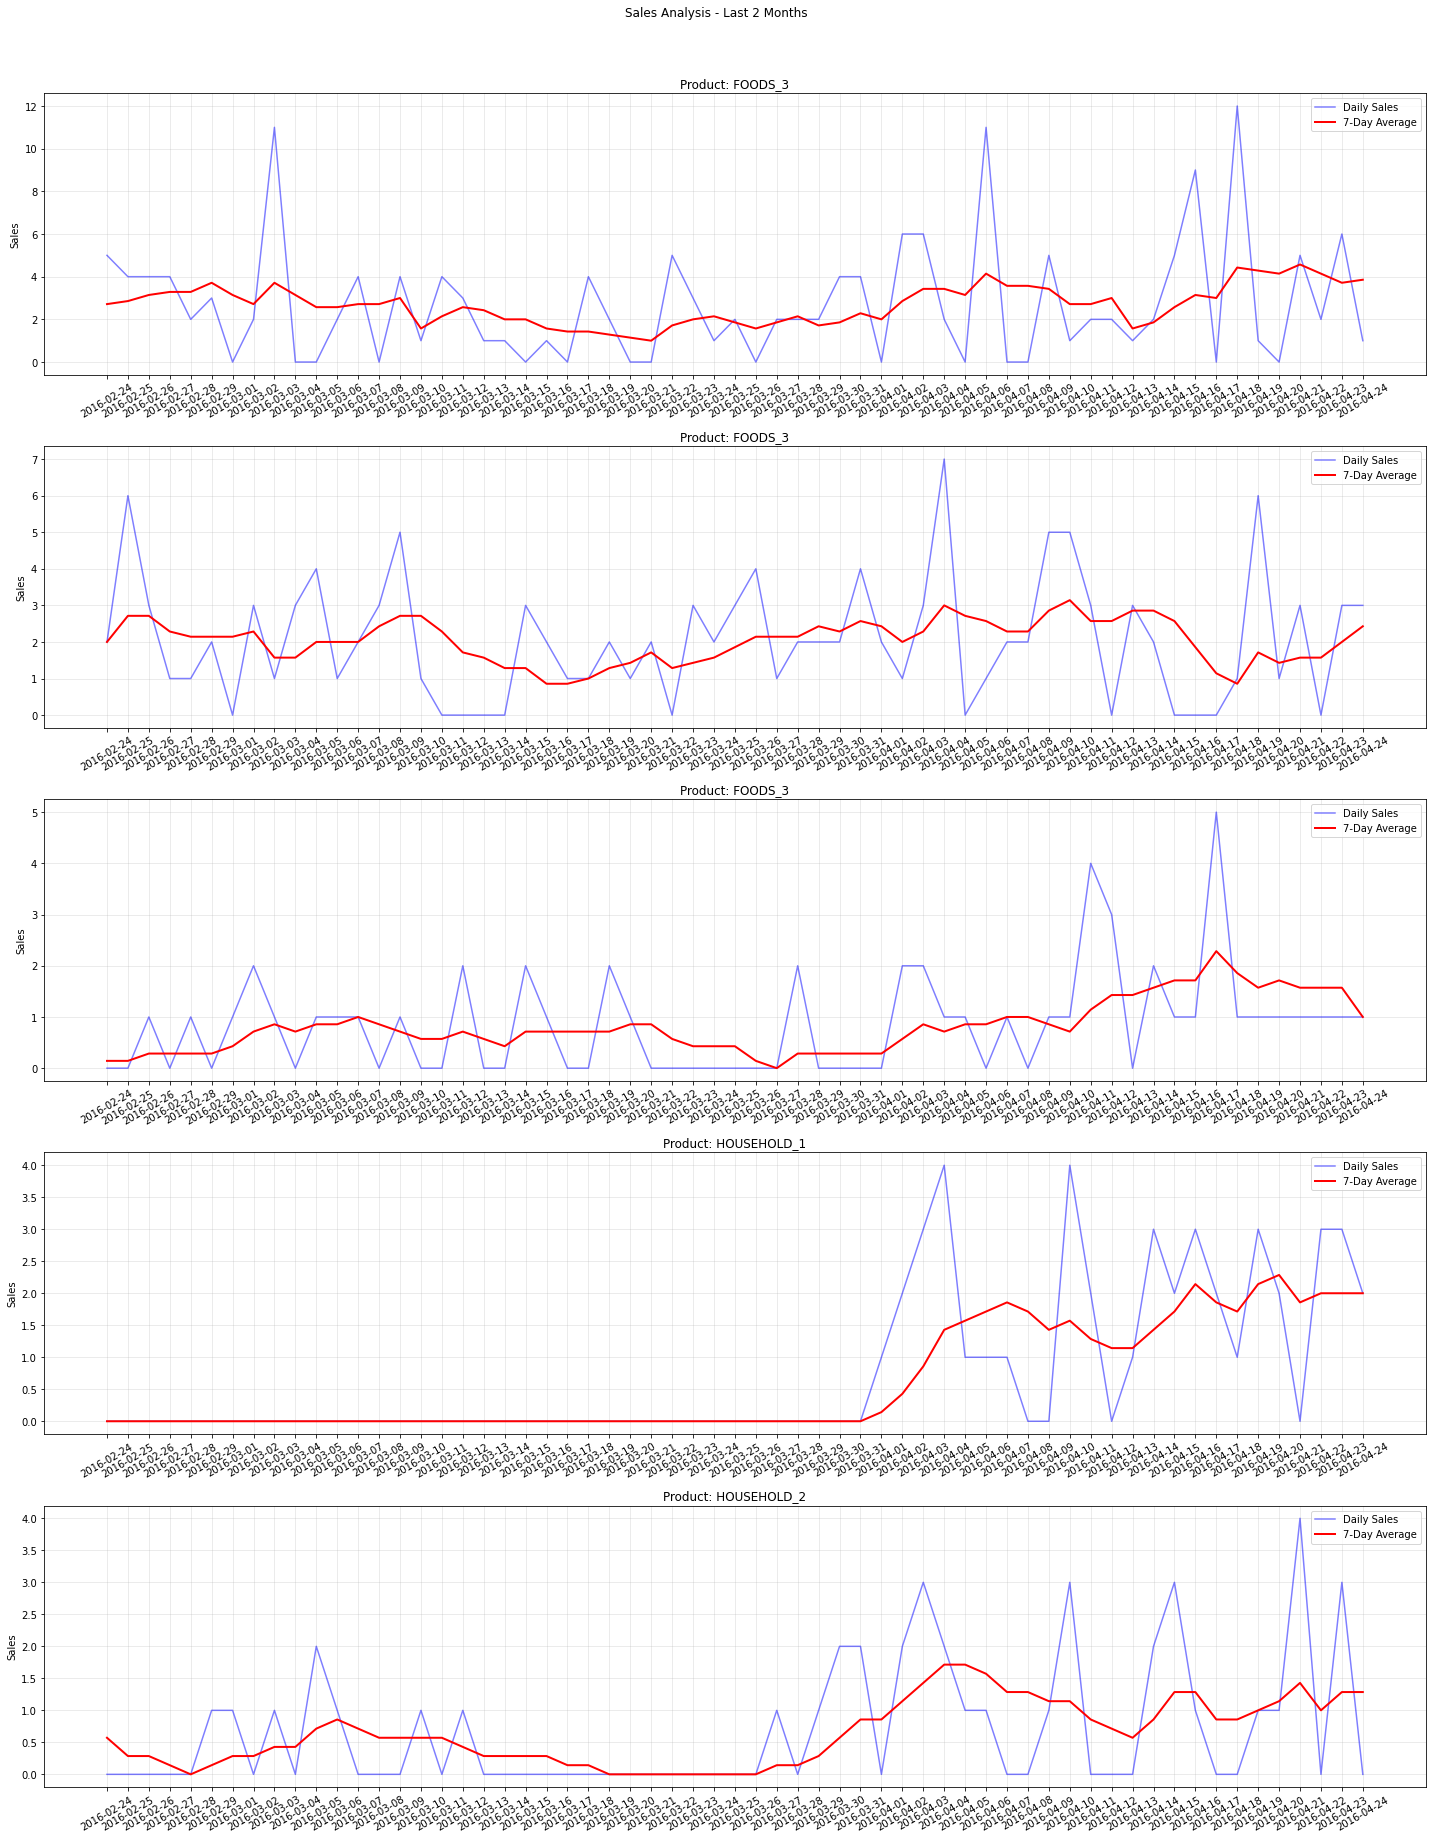

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

# random sample 5 id
sample_ids = data['id'].drop_duplicates().sample(5)
sample_data = data[data['id'].isin(sample_ids)]

# only take the last 2 months data
last_date = pd.to_datetime(data['date'].max())
two_months_ago = last_date - pd.DateOffset(months=2)
sample_data = data[
    (data['id'].isin(sample_ids)) & 
    (pd.to_datetime(data['date']) >= two_months_ago)
]

# 2. create plot
fig, axes = plt.subplots(5, 1, figsize=(20, 25))
plt.suptitle("Sales Analysis - Last 2 Months", y=1.02)

for ax, (pid, group) in zip(axes, sample_data.groupby('id')):
    # plot daily sales
    ax.plot(group['date'], group['sales'], 
            label='Daily Sales', color='blue', alpha=0.5)
    
    # plot 7-day average
    ax.plot(group['date'], group['rolling_mean_7'], 
            label='7-Day Average', color='red', linewidth=2)
    
    # custom
    ax.set_title(f"Product: {pid.split('_')[0]}_{pid.split('_')[1]}")
    ax.grid(True, alpha=0.3)
    ax.legend()
    ax.set_ylabel('Sales')
    
    # rotate x-axis labels
    plt.setp(ax.get_xticklabels(), rotation=30)

plt.tight_layout()
plt.show()


### 1.3.2 Feature Distribution 

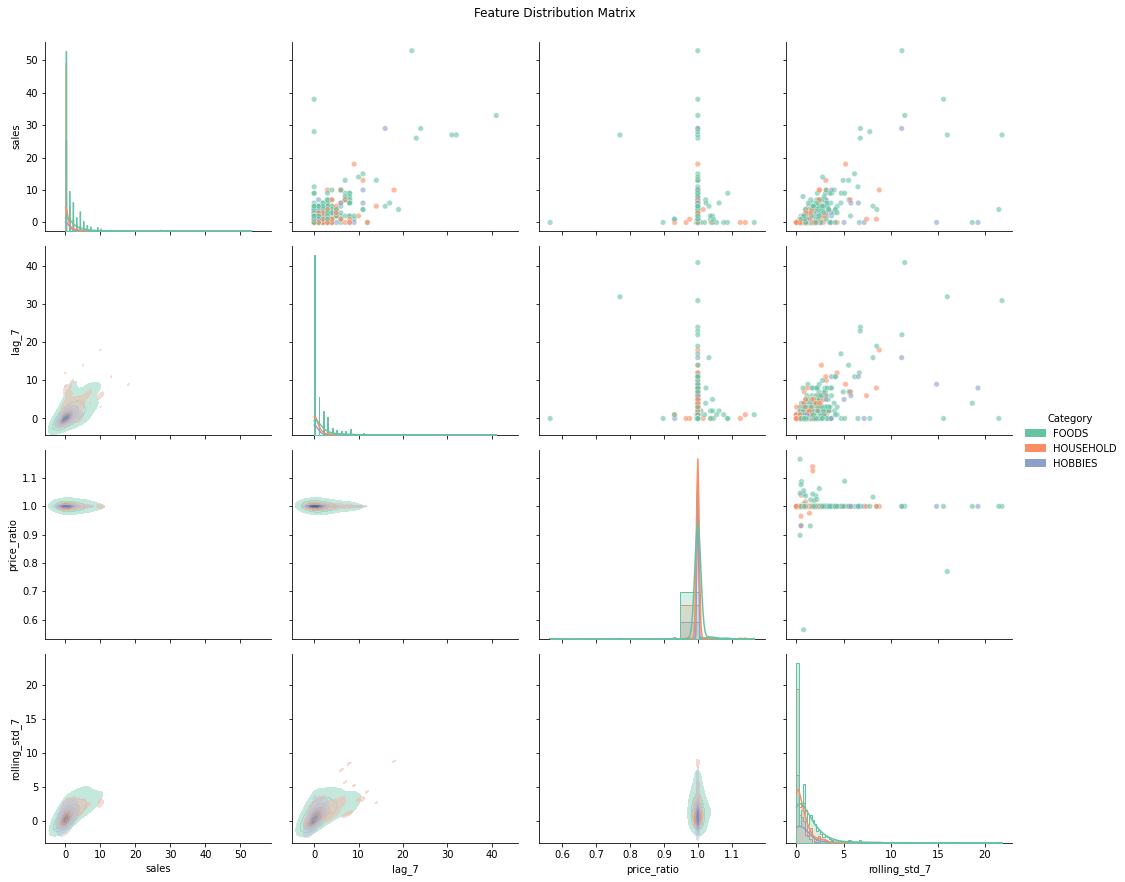

In [163]:
# sample 1000 data
sample_data = data.sample(1000)
plot_data = sample_data[['sales', 'lag_7', 'price_ratio', 'rolling_std_7', 'cat_id']]

# create color mapping
g = sns.PairGrid(plot_data, diag_sharey=False, hue='cat_id',
                 palette='Set2', height=3, aspect=1.2)
g.map_upper(sns.scatterplot, alpha=0.6, s=30, edgecolor='w')
g.map_lower(sns.kdeplot, fill=True, alpha=0.5)
g.map_diag(sns.histplot, element='step', kde=True)
g.add_legend(title='Category')
plt.suptitle("Feature Distribution Matrix", y=1.02)
plt.show()

### 1.3.3 Lag Feature Analysis

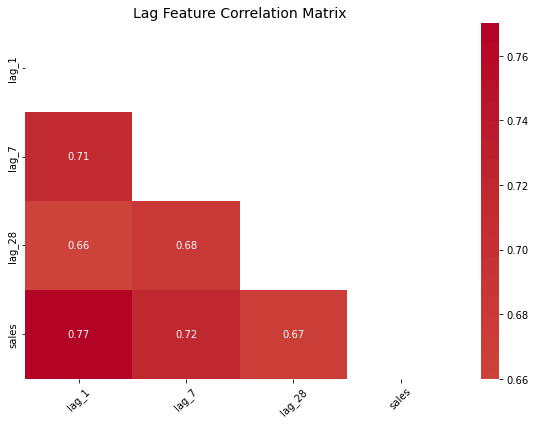

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns

# lag feature
lags = [f'lag_{i}' for i in [1, 7, 28]]
corr_matrix = data[lags + ['sales']].corr().round(2)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            mask=np.triu(np.ones_like(corr_matrix, dtype=bool)))
plt.title("Lag Feature Correlation Matrix", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300)
plt.show()

# 2. Training

In [25]:
def sample_by_date(data, sample_ratio=0.01, min_days=1):
    """
    sample data by date, ensure the date is continuous for all sequences
    data: the original data (need to contain the date column)
    sample_ratio: the sample ratio 
    min_days: the minimum days to keep (ensure enough to generate lag features)
    """
    # get the date range
    all_dates = data['d'].unique()
    sorted_dates = sorted(all_dates)
    
    # calculate the cutoff point
    total_days = len(sorted_dates)
    sample_days = max(min_days, int(total_days * sample_ratio))
    cutoff_date = sorted_dates[sample_days]
    
    # filter data
    # print(f"type of cutoff_date: {type(cutoff_date)}")
    # print(f"type of data['d']: {type(data['d'])}")
    # print(f"cutoff_date: {cutoff_date}")
    # print(f"data['d']: {data['d']}")
    sampled_data = data[data['d'] <= cutoff_date].copy()
    return sampled_data

def validate_sample(sampled_data):
    # check the date is continuous for all sequences
    date_check = sampled_data.groupby('id')['d'].agg(lambda x: x.is_monotonic_increasing)
    print(f"continuous sequence ratio: {date_check.mean():.2%}")
    
    # check the minimum days
    min_days = sampled_data.groupby('id').size().min()
    print(f"the shortest sequence days: {min_days}")
    
    # check the category coverage
    cat_coverage = sampled_data['cat_id'].nunique()
    print(f"the category coverage: {cat_coverage}/{data['cat_id'].nunique()}")



In [41]:
# Find the best model
# split data to train, val, test

# sampled_data = sample_by_date(data, sample_ratio=0.02)
sampled_data = data
validate_sample(sampled_data)

# follow the time sequence
sampled_data = sampled_data.sort_values(['id', 'd'])

# get unique dates and sort them
unique_dates = sampled_data['d'].unique()
unique_dates = sorted(unique_dates)

# calculate the split points
# use the ratio: 70% for train, 30% for val
total_days = len(unique_dates)
train_days = int(total_days * 0.7)

# set the split dates
train_end_date = unique_dates[train_days - 1]
val_end_date = unique_dates[np.max(sampled_data['d']) - 1]


print(f"total days: {total_days}")
print(f"train end date: {train_end_date}")
print(f"val end date: {val_end_date}")

# split data by date
train_data = sampled_data[sampled_data['d']<=train_end_date]
val_data = sampled_data[(sampled_data['d'] > train_end_date) & 
                (sampled_data['d'] <= val_end_date)]

# print the size of each dataset
print(f"train data size: {len(train_data)} rows, cover {train_data['date'].nunique()} days")
print(f"val data size: {len(val_data)} rows, cover {val_data['date'].nunique()} days")

# check if all product ids are included
print(f"train data product ids: {train_data['id'].nunique()}")
print(f"val data product ids: {val_data['id'].nunique()}")

continuous sequence ratio: 100.00%
the shortest sequence days: 1913
the category coverage: 3/3
total days: 1913
train end date: 1339
val end date: 1913
train data size: 40826110 rows, cover 1339 days
val data size: 17501260 rows, cover 574 days
train data product ids: 30490
val data product ids: 30490


In [ ]:
import optuna
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

# 1. define features and target
features = ['wday', 'month', 'is_weekend', 
            'lag_1', 'lag_7', 'lag_28',
            'rolling_mean_7', 'rolling_std_7',
            'price_ratio', 'snap_CA', 'snap_TX', 'snap_WI']

target = 'sales'

def objective(trial):
    # define the search space
    params = {
        "objective": "tweedie",
        "boosting_type": "gbdt",
        "metric": "rmse",
        "verbosity": -1,
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 20, 200),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 20, 200),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.5, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.5, 1.0),
        "lambda_l1": trial.suggest_float("lambda_l1", 0, 10),
        "lambda_l2": trial.suggest_float("lambda_l2", 0, 10),
    }
    
    train_set = lgb.Dataset(train_data[features], label=train_data[target])
    val_set = lgb.Dataset(val_data[features], label=val_data[target], reference=train_set)
    
    model = lgb.train(
        params,
        train_set,
        valid_sets=[val_set],
        num_boost_round=1000
    )
    
    preds = model.predict(val_data[features])
    rmse = np.sqrt(mean_squared_error(val_data[target], preds))
    return rmse

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

print("Best params:", study.best_params)

[I 2025-03-23 14:50:21,532] A new study created in memory with name: no-name-8ee87086-22e2-4bb6-89ba-6e30ad9a76b3


Best params: {'learning_rate': 0.0112582713051749, 'num_leaves': 174, 'max_depth': 8, 'min_data_in_leaf': 81, 'feature_fraction': 0.9294876816144166, 'bagging_fraction': 0.7669514987048659, 'lambda_l1': 7.790286242404434, 'lambda_l2': 7.5962975596810915}

Fold 1
Fold 2
Fold 3


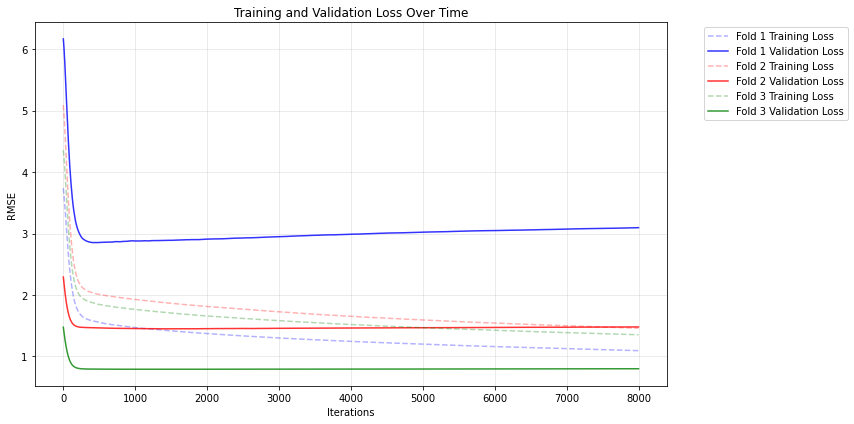


Final RMSE values:
Fold 1:
  Training RMSE: 1.0939
  Validation RMSE: 3.0953
Fold 2:
  Training RMSE: 1.4593
  Validation RMSE: 1.4799
Fold 3:
  Training RMSE: 1.3531
  Validation RMSE: 0.7997


In [33]:
''' LightGBM Model Training '''

import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt

# 1. define features and target
features = ['wday', 'month', 'is_weekend', 
            'lag_1', 'lag_7', 'lag_28',
            'rolling_mean_7', 'rolling_std_7',
            'price_ratio', 'snap_CA', 'snap_TX', 'snap_WI']

target = 'sales'

data_sampled = sampled_data
data_sampled = data_sampled.sort_values(['id', 'date'])

# 2. Time series cross-validation
tss = TimeSeriesSplit(n_splits=3)
train_losses = []
val_losses = []
for fold, (train_idx, val_idx) in enumerate(tss.split(data_sampled)):
    print(f"Fold {fold+1}")
    train_data = data_sampled.iloc[train_idx]
    val_data = data_sampled.iloc[val_idx]
    
    # convert to LightGBM Dataset
    dtrain = lgb.Dataset(
        train_data[features], 
        label=train_data[target],
        categorical_feature=['wday', 'month']
    )
    dval = lgb.Dataset(
        val_data[features], 
        label=val_data[target],
        reference=dtrain
    )

    eval_results = {}
    
    # model parameters
    params = {
        'boosting_type': 'gbdt',
        'objective': 'tweedie',
        'tweedie_variance_power': 1.1,
        'metric': 'rmse',
        'subsample': 0.5,
        'subsample_freq': 1,
        'learning_rate': 0.0112582713051749, 
        'num_leaves': 174, 
        'max_depth': 8, 
        'min_data_in_leaf': 81, 
        'feature_fraction': 0.9294876816144166, 
        'bagging_fraction': 0.7669514987048659, 
        'lambda_l1': 7.790286242404434, 
        'lambda_l2': 7.5962975596810915
    }
    
    # train model
    model = lgb.train(
        params,
        dtrain,
        valid_sets=[dtrain, dval],
        num_boost_round=8000,
        callbacks=[lgb.record_evaluation(eval_results)]
    )

    train_losses.append(eval_results['training']['rmse'])
    val_losses.append(eval_results['valid_1']['rmse'])

model.save_model('lgbm_model.pkl')

plt.figure(figsize=(12, 6))

# plot train and validation loss for each fold
color = ['blue', 'red', 'green']
for fold in range(len(train_losses)):
    plt.plot(train_losses[fold], 
             color=color[fold], 
             label=f'Fold {fold+1} Training Loss',
             alpha = 0.3,
             linestyle='--')
    plt.plot(val_losses[fold], 
             color=color[fold], 
             label=f'Fold {fold+1} Validation Loss',
             alpha = 0.8)

plt.title('Training and Validation Loss Over Time')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("\nFinal RMSE values:")
for fold in range(len(train_losses)):
    print(f"Fold {fold+1}:")
    print(f"  Training RMSE: {train_losses[fold][-1]:.4f}")
    print(f"  Validation RMSE: {val_losses[fold][-1]:.4f}")

# 3. Evaluation

In [ ]:
submission = pd.read_csv('m5-forecasting-accuracy/sample_submission.csv')

print(submission.info())
print(submission.head())
print(submission.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60980 entries, 0 to 60979
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      60980 non-null  object
 1   F1      60980 non-null  int64 
 2   F2      60980 non-null  int64 
 3   F3      60980 non-null  int64 
 4   F4      60980 non-null  int64 
 5   F5      60980 non-null  int64 
 6   F6      60980 non-null  int64 
 7   F7      60980 non-null  int64 
 8   F8      60980 non-null  int64 
 9   F9      60980 non-null  int64 
 10  F10     60980 non-null  int64 
 11  F11     60980 non-null  int64 
 12  F12     60980 non-null  int64 
 13  F13     60980 non-null  int64 
 14  F14     60980 non-null  int64 
 15  F15     60980 non-null  int64 
 16  F16     60980 non-null  int64 
 17  F17     60980 non-null  int64 
 18  F18     60980 non-null  int64 
 19  F19     60980 non-null  int64 
 20  F20     60980 non-null  int64 
 21  F21     60980 non-null  int64 
 22  F22     60980 non-null

In [169]:
def wrmsse(y_true, y_pred, scale):
    """
    y_true: Real values [n_samples, n_time_steps]
    y_pred: Predicted values [n_samples, n_time_steps]
    scale: Scaling factor for each sequence (usually the historical average)
    """
    scaled_errors = (y_true - y_pred) / scale[:, None]
    squared_errors = np.square(scaled_errors)
    rmsse = np.sqrt(np.mean(squared_errors, axis=1))
    weights = scale / np.sum(scale)
    return np.sum(weights * rmsse)

In [37]:
def prepare_test_data(sales_df, calendar_df, prices_df, days_to_predict=28):
    """
    Prepare test data: get the data of the last days_to_predict days for generating initial features
    """
    # get the maximum day
    max_d = sales_df.columns[-1]
    max_d_num = int(max_d.split('_')[1])  # extract the number part
    start_d = max_d_num - days_to_predict + 1
    
    print(f"Prepare data from d_{start_d} to d_{max_d_num}")
    
    # convert to long format
    id_vars = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']
    value_vars = [f'd_{i}' for i in range(start_d, max_d_num + 1)]
    
    df = sales_df.melt(
        id_vars=id_vars,
        value_vars=value_vars,
        var_name='d',
        value_name='sales'
    )

    # merge calendar data
    df = df.merge(
        calendar_df,
        on='d',
        how='left'
    )
        
    # extract the number part of d
    df['d'] = df['d'].str.extract('(\d+)').astype(int)
    
    # merge price data
    df = df.merge(
        prices_df,
        on=['store_id', 'item_id', 'wm_yr_wk'],
        how='left'
    )
    
    df['date'] = pd.to_datetime(df['date'])
    # add the weekend feature
    df['is_weekend'] = (df['wday'] <= 2).astype(int)
    
    return df


In [38]:
# forecast future 28 days
def recursive_forecast(base_df, model, features, calendar_df, prices_df, steps=28):
    """
    Recursive forecast future days' sales
    base_df: the base data (including historical sales information)
    model: the pre-trained model
    features: the features used in the model
    calendar_df: the calendar data
    prices_df: the price data
    steps: the number of days to forecast
    """
    # Ensure data is sorted by ID and date
    current_df = base_df.copy().sort_values(['id', 'date'])
    
    # Generate initial features
    current_df = create_lag_features(current_df)

    current_df['rolling_mean_7'] = current_df.groupby('id')['sales'].transform(
        lambda x: x.rolling(7, min_periods=1).mean()
    )
    current_df['rolling_std_7'] = current_df.groupby('id')['sales'].transform(
        lambda x: x.rolling(7, min_periods=1).std()
    )
    current_df['price_ratio'] = current_df.groupby('id')['sell_price'].transform(
        lambda x: x / x.rolling(28, min_periods=1).mean()
    )
    
    # store prediction results, one row per item, one column per day
    unique_ids = current_df['id'].unique()
    all_predictions = []

    for step in range(1, steps + 1):
        print(f"Step {step}/{steps}")
        
        # get the latest day data for each ID
        latest_df = current_df.groupby('id').apply(
            lambda x: x.iloc[-1]
        ).reset_index(drop=True)
        
        # Ensure all features have values
        if latest_df[features].isna().any().any():
            print("Warning: missing features, fill with 0")
            latest_df[features] = latest_df[features].fillna(0)
        
        # predict
        preds = model.predict(latest_df[features])
        
        # Ensure predicted values are non-negative
        preds = np.int_(np.round(np.maximum(preds, 0)))
        print(preds)

        all_predictions.append(preds)
        
        # prepare the next day data
        next_day_df = latest_df.copy()
        next_day_d_value = next_day_df['d'].iloc[0]
        # get the calendar information of the next day
        calendar_cols = ['d', 'date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year', 
                         'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2',
                         'snap_CA', 'snap_TX', 'snap_WI']
        next_day_df = next_day_df.drop(columns=calendar_cols, errors='ignore')
        calendar_info = calendar_df[calendar_df['d'].str.contains(f"d_{next_day_d_value}")][calendar_cols]

        next_day_df['sales'] = preds
        next_day_df['d'] = next_day_d_value + 1
        next_day_df = next_day_df.drop(columns=['sell_price'], errors='ignore')
        

        calendar_info['d'] = calendar_info['d'].str.extract('(\d+)').astype(int)
        # merge calendar information
        next_day_df = pd.merge(
            next_day_df,
            calendar_info,
            on='d',
            how='left'
        )
        # merge price information
        next_day_df = pd.merge(
            next_day_df,
            prices_df,
            on=['store_id', 'item_id', 'wm_yr_wk'],
            how='left'
        )
        # if some items have no latest price, use the price of the previous day
        if next_day_df['sell_price'].isna().any():
            price_map = dict(zip(latest_df['id'], latest_df['sell_price']))
            next_day_df.loc[next_day_df['sell_price'].isna(), 'sell_price'] = \
                next_day_df.loc[next_day_df['sell_price'].isna(), 'id'].map(price_map)
        
        # update the weekend feature
        next_day_df['is_weekend'] = (next_day_df['wday'] <= 2).astype(int)

        # add the new data to the current dataset
        current_df = pd.concat([current_df, next_day_df], ignore_index=True)
        
        # update the features
        current_df = create_lag_features(current_df.sort_values(['id', 'date']))
        current_df['rolling_mean_7'] = current_df.groupby('id')['sales'].transform(
            lambda x: x.rolling(7, min_periods=1).mean()
        )
        current_df['rolling_std_7'] = current_df.groupby('id')['sales'].transform(
            lambda x: x.rolling(7, min_periods=1).std()
        )
        current_df['price_ratio'] = current_df.groupby('id')['sell_price'].transform(
            lambda x: x / x.rolling(28, min_periods=1).mean()
        )
    
    # convert to array [n_items, n_days]
    predictions_array = np.column_stack(all_predictions)
    return predictions_array, unique_ids

In [39]:
# load model
model = lgb.Booster(model_file='lgbm_model.txt')
# evaluation F29-F56
print("Prepare test data for evaluation...")
test_eval_data = prepare_test_data(sales_eval, calendar, prices)

print("Start recursive forecast(F29-F56)...")
forecast_eval_values, forecast_eval_ids = recursive_forecast(
    test_eval_data, 
    model, 
    features,
    calendar,
    prices
)

print("Forecast evaluation completed, shape:", forecast_eval_values.shape)

# validation F1-F28
print("Prepare test data for validation...")
test_val_data = prepare_test_data(sales_vali, calendar, prices)

print("Start recursive forecast(F1-F28)...")
forecast_val_values, forecast_val_ids = recursive_forecast(
    test_val_data, 
    model, 
    features,
    calendar,
    prices
)

print("Forecast evaluation completed, shape:", forecast_val_values.shape)


Prepare test data for evaluation...
Prepare data from d_1914 to d_1941
Start recursive forecast(F29-F56)...
Step 1/28
[0 1 1 ... 0 0 0]
Step 2/28
[0 1 1 ... 0 0 0]
Step 3/28
[0 1 1 ... 0 0 0]
Step 4/28
[0 1 1 ... 0 0 0]
Step 5/28
[0 1 1 ... 0 0 0]
Step 6/28
[0 1 1 ... 0 0 0]
Step 7/28
[0 1 1 ... 0 0 0]
Step 8/28
[0 1 1 ... 0 0 0]
Step 9/28
[0 1 1 ... 0 0 0]
Step 10/28
[0 1 1 ... 0 0 0]
Step 11/28
[0 1 1 ... 0 0 0]
Step 12/28
[0 1 1 ... 0 0 0]
Step 13/28
[0 1 1 ... 0 0 0]
Step 14/28
[0 1 1 ... 0 0 0]
Step 15/28
[0 1 1 ... 0 0 0]
Step 16/28
[0 1 1 ... 0 0 0]
Step 17/28
[0 1 1 ... 0 0 0]
Step 18/28
[0 1 1 ... 0 0 0]
Step 19/28
[0 1 1 ... 0 0 0]
Step 20/28
[0 1 1 ... 0 0 0]
Step 21/28
[0 1 1 ... 0 0 0]
Step 22/28
[0 1 1 ... 0 0 0]
Step 23/28
[0 1 1 ... 0 0 0]
Step 24/28
[0 1 1 ... 0 0 0]
Step 25/28
[0 1 1 ... 0 0 0]
Step 26/28
[0 1 1 ... 0 0 0]
Step 27/28
[0 1 1 ... 0 0 0]
Step 28/28
[0 1 1 ... 0 0 0]
Forecast evaluation completed, shape: (30490, 28)
Prepare test data for validation...
Pre

In [40]:
# Convert to submission format
sample_sub = pd.read_csv('m5-forecasting-accuracy/sample_submission.csv')
submission = sample_sub.copy()
# Map prediction results to submission format
for i, id_ in enumerate(forecast_val_ids):
    # find the corresponding row in the submission
    mask = submission['id'].str.startswith(id_.split('_validation')[0])
    # fill the prediction values
    submission.loc[mask, 'F1':'F28'] = forecast_val_values[i]

for i, id_ in enumerate(forecast_eval_ids):
    mask = submission['id'].str.startswith(id_.split('_evaluation')[0])
    submission.loc[mask, 'F1':'F28'] = forecast_eval_values[i]

print("Save submission file...")
submission.to_csv('submission.csv', index=False)
print("Completed!")

Save submission file...
Completed!
